In [ ]:
# First, let's go over how to import data into pandas.
# As always, our first step in using Pandas is to import it.

In [3]:
# This is convention. 99 times out of 100, there is no reason to not use this convention
import pandas as pd


In [ ]:
#Now that pandas is imported, let's import a file into pandas. Pandas can natively understand
#Comma-separated values (CSV)
#XLSX
#ZIP
#Plain Text (txt)
#JSON
#XML
#HTML
#Images
#Hierarchical Data Format
#PDF
#DOCX
#MP3
#MP4
#SQL
#Though, it handles these in different ways, so don't go around using MP4s to make DataFrames.


In [4]:
#We are creating a dataframe from the read data.
df = pd.read_csv('Dummy_data.csv')

#The print function gives us a nice view of what our data looks like
print(df)


       Name    Position  Hours Worked  Pay Type  Pay Rate Pay Period
0      Bill     Janitor          40.0    Hourly        25     Weekly
1  Jennifer         CEO           NaN  Salaried      3000     Weekly
2      Jill         CTO           NaN  Salaried      2500     Weekly
3      Jack         COO           NaN  Salaried      2500    Weeklyn
4       Ted  QA Testing          25.0    Hourly        20    Weeklyn
5      John  Programmer           NaN  Salaried      1500       Week


In [ ]:
#You can see, we already have some issues. We have some things that are mispelled, and we have a column that has quite 
#A few NaN values.


In [ ]:
#Let's say that we want to calculate how much money is spent paying wages in a month. How could we go about doing that?

In [ ]:
#We know that we need to calculate the amount of money spent on a person per week, so let's add a column that does that.
#Let's create a new Column called "Weekly Earned"

In [ ]:
 #first we have to apply some logic. How would the weekly earned be calculated?
 # Is it going to be a row calculation, or a column calculation?
 #It's going to be a row, so let's genercize some things

In [5]:
#First we have to define our function.
#It's going to operate on a row basis, so we know we're going to be passed one.

def weekly_calculator(row):
    if row["Pay Type"] == "Hourly":
        return row["Hours Worked"] * row["Pay Rate"]
    else:
        return row["Pay Rate"]


In [6]:
#When we use the apply method, with the optional parameter axis=1, we tell pandas, to pass the function rows one after another.
#What pandas is going to do is create, a new Series, save the values in that series, and then use that Series to create a new
#column

df["Weekly Earned"] = df.apply(weekly_calculator,axis=1)

In [7]:
df

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25,Weekly,1000.0
1,Jennifer,CEO,NaN,Salaried,3000,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500,Weeklyn,2500.0
4,Ted,QA Testing,25.0,Hourly,20,Weeklyn,500.0
5,John,Programmer,NaN,Salaried,1500,Week,1500.0


In [8]:
def clean_value(column_value):
    return "Weekly"


In [9]:
#Here, we are changing up the apply method. With the default of axis = 0, Pandas will instead pass us
#individual column values one after another. It is going to create a new Series. We are going to store
#That created Series
df["Pay Period"] = df["Pay Period"].apply(clean_value)

In [10]:
df

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25,Weekly,1000.0
1,Jennifer,CEO,NaN,Salaried,3000,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500,Weekly,1500.0


In [11]:
#How to get the arithmetic mean of a column. 
df["Weekly Earned"].mean()

1833.3333333333333

In [12]:
#How to get the standard deviation
df["Weekly Earned"].std()

983.1920802501751

In [13]:
#Let's try adding a row.
#We need three parts to a row.
#We need the Data Values, which are the values in the row.
#We need the indexes to attach them to, or the "column" headers
#Then the series itself needs a name. It will use this
d = ["Cruz","Baker"]
ser = pd.Series(data=d,index=["Name","Position"],name=0)
ser

Name         Cruz
Position    Baker
Name: 0, dtype: object

In [14]:
df = df.append(ser)

In [15]:
df

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0
0,Cruz,Baker,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Any values it doesn't find will be filled in with NaN
#Here we have an interesting case.
#We now have two items with the same index.
#How can we solve this?>

In [18]:
#When we use the drop tag, it tells us to get rid of the already existing index.
df.reset_index(drop=True, inplace=True)
df

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0
6,Cruz,Baker,NaN,NaN,NaN,NaN,NaN


In [19]:

#Use the row number instead of the index value
df.drop(df.index[[1,2]])

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
3,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0
6,Cruz,Baker,NaN,NaN,NaN,NaN,NaN


In [20]:
##Use the index value
df.drop(0)

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
1,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0
6,Cruz,Baker,NaN,NaN,NaN,NaN,NaN


In [21]:
df.append(ser)

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0
6,Cruz,Baker,NaN,NaN,NaN,NaN,NaN
0,Cruz,Baker,NaN,NaN,NaN,NaN,NaN


In [22]:
#It dropped both!
df.drop(0)

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
1,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0
6,Cruz,Baker,NaN,NaN,NaN,NaN,NaN


In [23]:
#How would we join two DataFrames?
df2 = pd.read_csv('Dummy_data2.csv')
df2

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period
0,Hugh,Programmer,40,Hourly,30,Weekly
1,Grant,QA Testing,10,Hourly,15,NaN
2,Bobberton,Customer Service,20,Hourly,10,Weekly
3,James,QA,40,Hourly,40,Weeklyn
4,Sarah,sss,30,Hourly,0,NaN
5,Wendy,NaN,25,Hourly,1,Week


In [ ]:
#we can see that this one is a bit messier
#Let's do some work to clean it up


In [24]:
#Let's add Weekly to everyone's Pay Period
df2["Pay Period"] = df["Pay Period"].apply(clean_value)

In [25]:
df2

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period
0,Hugh,Programmer,40,Hourly,30,Weekly
1,Grant,QA Testing,10,Hourly,15,Weekly
2,Bobberton,Customer Service,20,Hourly,10,Weekly
3,James,QA,40,Hourly,40,Weekly
4,Sarah,sss,30,Hourly,0,Weekly
5,Wendy,NaN,25,Hourly,1,Weekly


In [ ]:
#Let's handle the Payrate. If it's under 10 an hour, let's fill it in with NaN

In [26]:
def clear_bad_values(row):
    if row["Pay Rate"] < 10 :
        return None
    else:
        return row["Pay Rate"]

In [27]:
df2["Pay Rate"] = df2.apply(clear_bad_values, axis = 1)

In [28]:
df2

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period
0,Hugh,Programmer,40,Hourly,30.0,Weekly
1,Grant,QA Testing,10,Hourly,15.0,Weekly
2,Bobberton,Customer Service,20,Hourly,10.0,Weekly
3,James,QA,40,Hourly,40.0,Weekly
4,Sarah,sss,30,Hourly,NaN,Weekly
5,Wendy,NaN,25,Hourly,NaN,Weekly


In [29]:
#Now let's target that sss in the Position
#Let's assume that all the positions are ["Programmer,QA Testing,Customer Service, QA"]
def clear_position(row):
    position = ["Programmer","QA Testing","Customer Service","QA"]
    if row["Position"] in position:
        return row["Position"]
    else:
        return None
    

In [30]:
df2["Position"] = df2.apply(clear_position,axis=1)

In [31]:
df2

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period
0,Hugh,Programmer,40,Hourly,30.0,Weekly
1,Grant,QA Testing,10,Hourly,15.0,Weekly
2,Bobberton,Customer Service,20,Hourly,10.0,Weekly
3,James,QA,40,Hourly,40.0,Weekly
4,Sarah,None,30,Hourly,NaN,Weekly
5,Wendy,None,25,Hourly,NaN,Weekly


In [32]:
#Now let's try to add that Weekly Earned 

df2["Weekly Earned"] = df2.apply(weekly_calculator,axis=1)
df2

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Hugh,Programmer,40,Hourly,30.0,Weekly,1200.0
1,Grant,QA Testing,10,Hourly,15.0,Weekly,150.0
2,Bobberton,Customer Service,20,Hourly,10.0,Weekly,200.0
3,James,QA,40,Hourly,40.0,Weekly,1600.0
4,Sarah,None,30,Hourly,NaN,Weekly,NaN
5,Wendy,None,25,Hourly,NaN,Weekly,NaN


In [33]:
#Now we have two cleaned up data frames.
#Let's add them together


# Sneaky way of adding a row in place
# Needs all values
df2.loc[2.5] = "Yokes", "Wowza", 40 , "Hourly", 30, "weekly", 1200


In [34]:
#Dirty way of adding a column 
df2 = df2.sort_index().reset_index(drop=True)
df2


,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Hugh,Programmer,40,Hourly,30.0,Weekly,1200.0
1,Grant,QA Testing,10,Hourly,15.0,Weekly,150.0
2,Bobberton,Customer Service,20,Hourly,10.0,Weekly,200.0
3,Yokes,Wowza,40,Hourly,30.0,weekly,1200.0
4,James,QA,40,Hourly,40.0,Weekly,1600.0
5,Sarah,None,30,Hourly,NaN,Weekly,NaN
6,Wendy,None,25,Hourly,NaN,Weekly,NaN


In [35]:
df

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0
6,Cruz,Baker,NaN,NaN,NaN,NaN,NaN


In [36]:
df2

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Hugh,Programmer,40,Hourly,30.0,Weekly,1200.0
1,Grant,QA Testing,10,Hourly,15.0,Weekly,150.0
2,Bobberton,Customer Service,20,Hourly,10.0,Weekly,200.0
3,Yokes,Wowza,40,Hourly,30.0,weekly,1200.0
4,James,QA,40,Hourly,40.0,Weekly,1600.0
5,Sarah,None,30,Hourly,NaN,Weekly,NaN
6,Wendy,None,25,Hourly,NaN,Weekly,NaN


In [38]:
df+df2
#Default behavior of addition. Not very Helpful

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,BillHugh,JanitorProgrammer,80.0,HourlyHourly,55.0,WeeklyWeekly,2200.0
1,JenniferGrant,CEOQA Testing,NaN,SalariedHourly,3015.0,WeeklyWeekly,3150.0
2,JillBobberton,CTOCustomer Service,NaN,SalariedHourly,2510.0,WeeklyWeekly,2700.0
3,JackYokes,COOWowza,NaN,SalariedHourly,2530.0,Weeklyweekly,3700.0
4,TedJames,QA TestingQA,65.0,HourlyHourly,60.0,WeeklyWeekly,2100.0
5,JohnSarah,NaN,NaN,SalariedHourly,NaN,WeeklyWeekly,NaN
6,CruzWendy,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df3 = pd.concat([df,df2])
#This is a way to add to the bottom.
#Indexes are messed up though, so let's reset it
df3

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0
6,Cruz,Baker,NaN,NaN,NaN,NaN,NaN
0,Hugh,Programmer,40.0,Hourly,30.0,Weekly,1200.0
1,Grant,QA Testing,10.0,Hourly,15.0,Weekly,150.0
2,Bobberton,Customer Service,20.0,Hourly,10.0,Weekly,200.0


In [44]:
df3 = df3.sort_index().reset_index(drop=True)
df3

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Hugh,Programmer,40.0,Hourly,30.0,Weekly,1200.0
2,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
3,Grant,QA Testing,10.0,Hourly,15.0,Weekly,150.0
4,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
5,Bobberton,Customer Service,20.0,Hourly,10.0,Weekly,200.0
6,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
7,Yokes,Wowza,40.0,Hourly,30.0,weekly,1200.0
8,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
9,James,QA,40.0,Hourly,40.0,Weekly,1600.0


In [45]:
#We have a nice dataset to work with, so now, let's go over how to display data
#Pandas engine is built off of matplotlib, and I prefer it to pandas implementation.

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#Once again, this is just convention, try not to deviate here


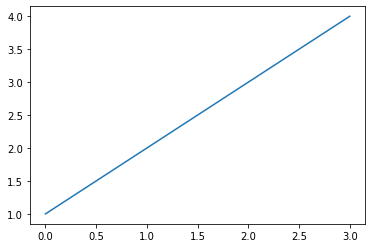

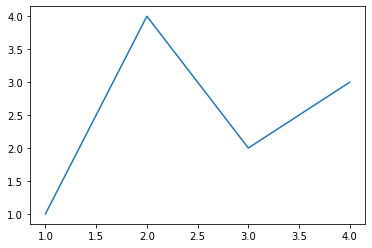

In [48]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.
#There is some INTERPOLATION GOING ON HERE

https://matplotlib.org/stable/_images/anatomy.png

<Figure size 432x288 with 0 Axes>

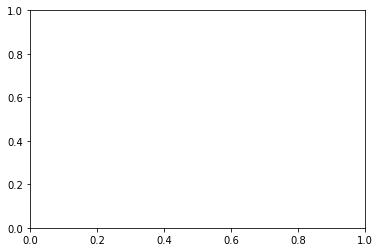

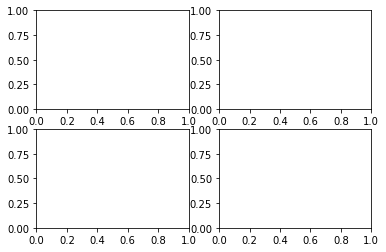

In [52]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

Axes
An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ax.plot(), shown above, uses the plot method)

Axis
These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

Artist
Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

<AxesSubplot:>

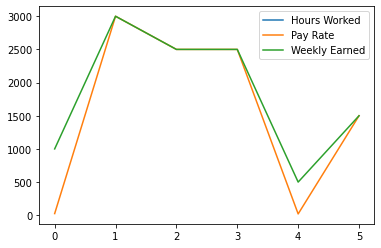

In [54]:
df.plot()

In [55]:
df

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
2,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
3,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
4,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
5,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0
6,Cruz,Baker,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Pay Rate'>

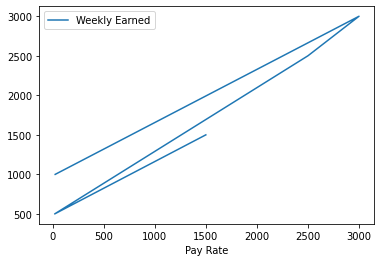

In [59]:
df.plot(x="Pay Rate",y="Weekly Earned")

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

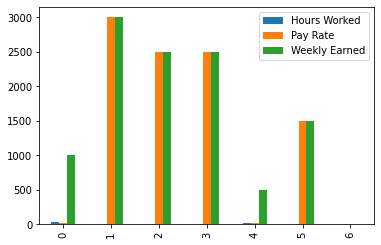

In [61]:
plt.figure()
df.plot(kind="bar")

<AxesSubplot:>

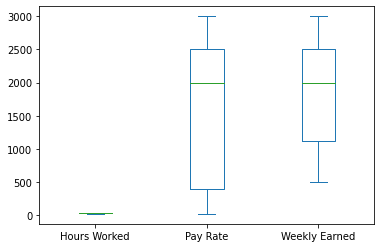

In [62]:
df.plot(kind="box")

<AxesSubplot:ylabel='Density'>

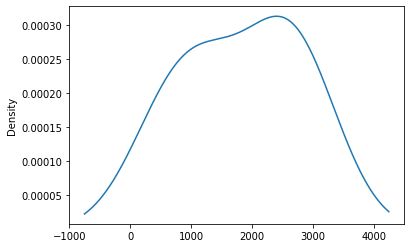

In [64]:
df["Weekly Earned"].plot( kind="kde")

<AxesSubplot:xlabel='Hours Worked', ylabel='Pay Rate'>

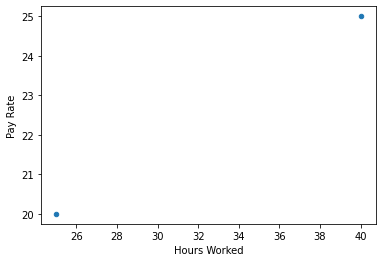

In [68]:
df.plot(kind="scatter",x="Hours Worked",y="Pay Rate")

<AxesSubplot:>

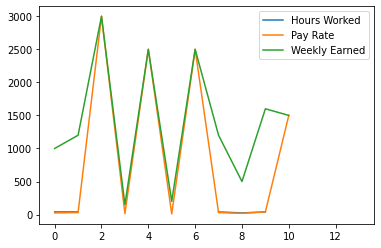

In [69]:
df3.plot()

In [81]:
#Let's make a comparison. Does the average salried worked make more than the average hourly worker?
df3



,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Hugh,Programmer,40.0,Hourly,30.0,Weekly,1200.0
2,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
3,Grant,QA Testing,10.0,Hourly,15.0,Weekly,150.0
4,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
5,Bobberton,Customer Service,20.0,Hourly,10.0,Weekly,200.0
6,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
7,Yokes,Wowza,40.0,Hourly,30.0,weekly,1200.0
8,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
9,James,QA,40.0,Hourly,40.0,Weekly,1600.0


In [86]:
data_on_hourly = df3[df3["Pay Type"] == "Hourly"]
data_on_hourly

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Hugh,Programmer,40.0,Hourly,30.0,Weekly,1200.0
3,Grant,QA Testing,10.0,Hourly,15.0,Weekly,150.0
5,Bobberton,Customer Service,20.0,Hourly,10.0,Weekly,200.0
7,Yokes,Wowza,40.0,Hourly,30.0,weekly,1200.0
8,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
9,James,QA,40.0,Hourly,40.0,Weekly,1600.0
11,Sarah,None,30.0,Hourly,NaN,Weekly,NaN
13,Wendy,None,25.0,Hourly,NaN,Weekly,NaN


In [91]:
data_on_hourly_without_NAN = data_on_hourly[data_on_hourly["Weekly Earned"]>0]
data_on_hourly_without_NAN
data_on_hourly_without_NAN.reset_index(drop=True)

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Hugh,Programmer,40.0,Hourly,30.0,Weekly,1200.0
2,Grant,QA Testing,10.0,Hourly,15.0,Weekly,150.0
3,Bobberton,Customer Service,20.0,Hourly,10.0,Weekly,200.0
4,Yokes,Wowza,40.0,Hourly,30.0,weekly,1200.0
5,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
6,James,QA,40.0,Hourly,40.0,Weekly,1600.0


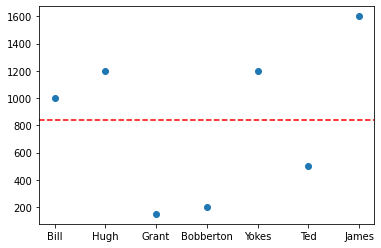

In [100]:
plt.scatter(x=data_on_hourly_without_NAN["Name"],y=data_on_hourly_without_NAN["Weekly Earned"])
plt.axhline(y=data_on_hourly_without_NAN["Weekly Earned"].mean(), color='r', linestyle='--')
##This includes part time workers. 
##Let's exclude them


In [105]:
data_on_hourly_without_NAN_full_time =data_on_hourly_without_NAN[data_on_hourly_without_NAN["Hours Worked"]>=40]
data_on_hourly_without_NAN_full_time

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Hugh,Programmer,40.0,Hourly,30.0,Weekly,1200.0
7,Yokes,Wowza,40.0,Hourly,30.0,weekly,1200.0
9,James,QA,40.0,Hourly,40.0,Weekly,1600.0


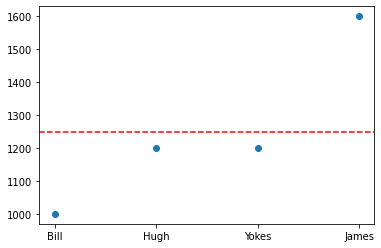

In [107]:
plt.scatter(x=data_on_hourly_without_NAN_full_time["Name"],y=data_on_hourly_without_NAN_full_time["Weekly Earned"])
plt.axhline(y=data_on_hourly_without_NAN_full_time["Weekly Earned"].mean(), color='r', linestyle='--')

In [108]:
#Great work. Now Let's see that for the salaried
df3

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
0,Bill,Janitor,40.0,Hourly,25.0,Weekly,1000.0
1,Hugh,Programmer,40.0,Hourly,30.0,Weekly,1200.0
2,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
3,Grant,QA Testing,10.0,Hourly,15.0,Weekly,150.0
4,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
5,Bobberton,Customer Service,20.0,Hourly,10.0,Weekly,200.0
6,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
7,Yokes,Wowza,40.0,Hourly,30.0,weekly,1200.0
8,Ted,QA Testing,25.0,Hourly,20.0,Weekly,500.0
9,James,QA,40.0,Hourly,40.0,Weekly,1600.0


In [110]:
salaried_df = df3[df3["Pay Type"] == "Salaried"]
salaried_df

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
2,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
4,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
6,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
10,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0


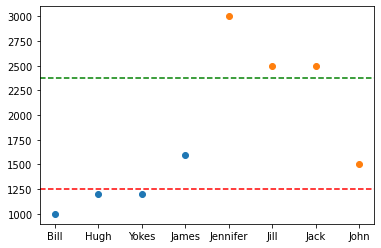

In [115]:
plt.scatter(x=data_on_hourly_without_NAN_full_time["Name"],y=data_on_hourly_without_NAN_full_time["Weekly Earned"])
plt.axhline(y=data_on_hourly_without_NAN_full_time["Weekly Earned"].mean(), color='r', linestyle='--')
plt.scatter(x=salaried_df["Name"],y=salaried_df["Weekly Earned"])
plt.axhline(y=salaried_df["Weekly Earned"].mean(),color="green",linestyle="--")
plt.show()

In [120]:
salaried_df["Weekly Earned"].mean()

2375.0

In [121]:
salaried_df["Weekly Earned"].std()

629.1528696058958

In [126]:
salaried_df["Weekly Earned"].mean() - salaried_df.at[10,"Weekly Earned"]

875.0

In [127]:
(salaried_df["Weekly Earned"].mean() - salaried_df.at[10,"Weekly Earned"])/ salaried_df["Weekly Earned"].std()

1.390758974918296

In [ ]:
#He's only 1.4 SDs away

Let's see what the chart looks like without him anyway

In [128]:
salaried_df

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
2,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
4,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
6,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0
10,John,Programmer,NaN,Salaried,1500.0,Weekly,1500.0


In [130]:
salaried_df.drop(10)

,Name,Position,Hours Worked,Pay Type,Pay Rate,Pay Period,Weekly Earned
2,Jennifer,CEO,NaN,Salaried,3000.0,Weekly,3000.0
4,Jill,CTO,NaN,Salaried,2500.0,Weekly,2500.0
6,Jack,COO,NaN,Salaried,2500.0,Weekly,2500.0


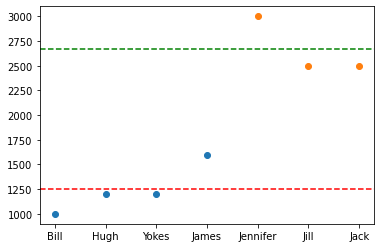

In [140]:
plt.scatter(x=data_on_hourly_without_NAN_full_time["Name"],y=data_on_hourly_without_NAN_full_time["Weekly Earned"])
plt.axhline(y=data_on_hourly_without_NAN_full_time["Weekly Earned"].mean(), color='r', linestyle='--')
plt.scatter(x=salaried_df.drop(10)["Name"],y=salaried_df.drop(10)["Weekly Earned"])
plt.axhline(y=salaried_df.drop(10)["Weekly Earned"].mean(),color="green",linestyle="--")
plt.show()